In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

Read the CSV file and display first 5 entries
You can either choose file with original or normalized values

In [2]:
data = pd.read_csv("feature_values.csv") #My generated file with unedited values
# data = pd.read_csv("all_new_features_hier_norm.csv") #Authors file
# data = pd.read_csv("all_new_features_hier_norm_top_1.csv") #Student's file
# data = pd.read_csv("feature_values_normalized.csv") #My generated file with normalized and scaled values
data.head()

,filename,Mobilenet_v1,Inception_v4,Resnet_v1_152,kp_surf,average_perceived_brightness,contrast,area_by_perim,aspect_ratio,edge_length1,hue1
0,ILSVRC2012_val_00000001.JPEG,1,0,0,3657,189.692869,24.824576,33.795181,3.882353,275,0.007221
1,ILSVRC2012_val_00000002.JPEG,0,0,0,7029,174.428835,58.779438,45.239859,4.017699,275,0.002446
2,ILSVRC2012_val_00000003.JPEG,1,0,0,2248,93.423358,44.725204,87.616262,0.980226,218,0.017275
3,ILSVRC2012_val_00000004.JPEG,1,0,0,1211,150.763832,42.931180,75.765422,1.289963,286,0.019652
4,ILSVRC2012_val_00000005.JPEG,0,1,0,6270,118.078176,57.030755,91.372124,1.232628,158,0.012794


Train and test Decision Tree using all 4 classes (MobileNet, Inception, ResNet, Failed)

In [3]:
Y = data[['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152']]
X = data.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X) 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
X = np.array(X)
df = pd.DataFrame(data = X, columns = ['kp_surf', 'average_perceived_brightness', 'contrast', 'area_by_perim',
                                       'aspect_ratio', 'edge_length1', 'hue1'])

In [6]:
trees = []
feature_names = ['kp_surf', 'aver_perc_bright', 'contrast', 'area_by_perim', 'aspect_ratio', 'edge_length', 'hue']
for x in range(20):
    tree_model = DecisionTreeClassifier()
    parameters = {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': [x+1]}
    clf = GridSearchCV(tree_model, parameters)
    clf.fit(x_train, y_train)
    tree_model.set_params(**clf.best_params_)
    tree_model.fit(x_train, y_train)
    print("Depth: ", x+1)
    print("Training Accuracy: {}%".format(round(tree_model.score(x_train, y_train)*100, 3)))
    print("Testing Accuracy: {}%".format(round(tree_model.score(x_test, y_test)*100, 3)))
    print("\n")
    trees.append(tree_model)

Depth:  1
Training Accuracy: 72.15%
Testing Accuracy: 71.6%


Depth:  2
Training Accuracy: 72.15%
Testing Accuracy: 71.6%


Depth:  3
Training Accuracy: 72.225%
Testing Accuracy: 71.4%


Depth:  4
Training Accuracy: 72.3%
Testing Accuracy: 71.6%


Depth:  5
Training Accuracy: 71.975%
Testing Accuracy: 70.4%


Depth:  6
Training Accuracy: 72.05%
Testing Accuracy: 70.4%


Depth:  7
Training Accuracy: 71.825%
Testing Accuracy: 67.7%


Depth:  8
Training Accuracy: 72.25%
Testing Accuracy: 68.9%


Depth:  9
Training Accuracy: 72.5%
Testing Accuracy: 68.6%


Depth:  10
Training Accuracy: 75.375%
Testing Accuracy: 63.3%


Depth:  11
Training Accuracy: 75.95%
Testing Accuracy: 66.6%


Depth:  12
Training Accuracy: 75.9%
Testing Accuracy: 65.2%


Depth:  13
Training Accuracy: 80.45%
Testing Accuracy: 60.0%


Depth:  14
Training Accuracy: 80.0%
Testing Accuracy: 61.1%


Depth:  15
Training Accuracy: 85.175%
Testing Accuracy: 61.7%


Depth:  16
Training Accuracy: 86.2%
Testing Accuracy: 60.1%


D

[0. 0. 0. 1. 0. 0. 0.]


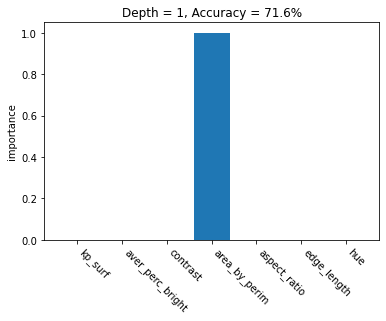

[0.         0.         0.06551817 0.93448183 0.         0.
 0.        ]


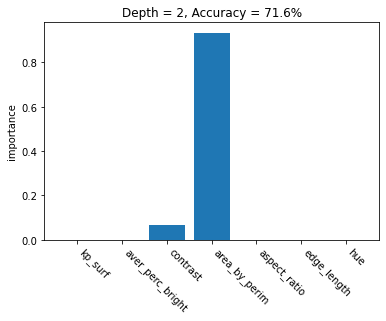

[0.1308186  0.43585903 0.23175631 0.         0.         0.
 0.20156606]


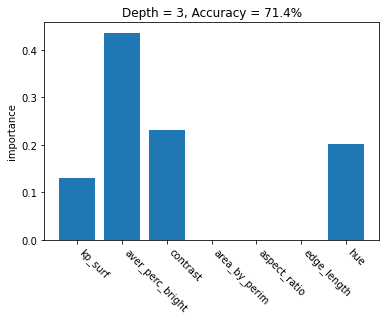

[0.06171533 0.         0.16320402 0.30453815 0.34639307 0.07219315
 0.05195629]


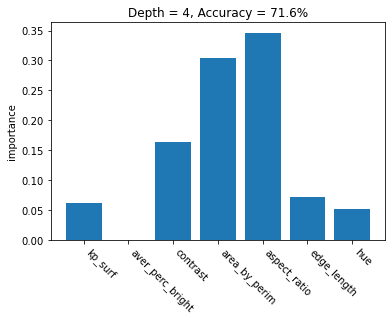

[0.01912847 0.16253417 0.10783464 0.58548318 0.02100801 0.03674093
 0.0672706 ]


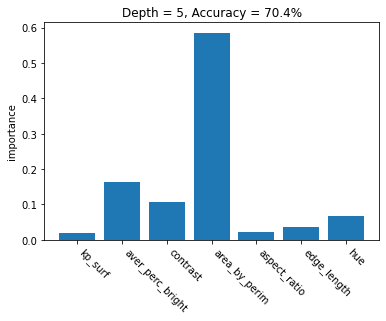

[0.18247151 0.01734055 0.08752851 0.33075393 0.0707836  0.18461089
 0.12651102]


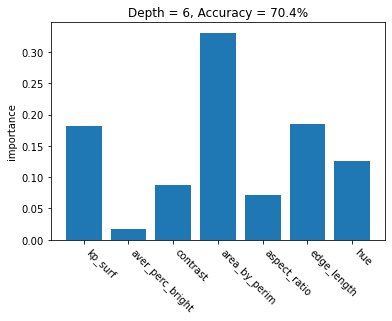

[0.13184355 0.07270329 0.14652069 0.34030716 0.13363714 0.085285
 0.08970318]


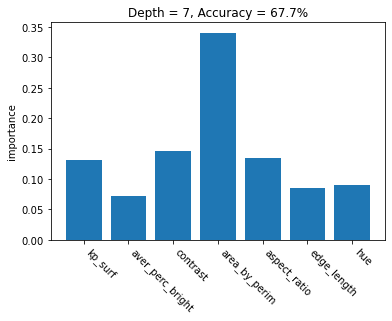

[0.03102536 0.14784601 0.17394794 0.3620451  0.1132735  0.08013902
 0.09172306]


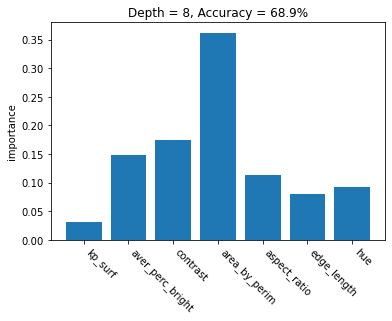

[0.07303105 0.12599043 0.13815024 0.31309566 0.11404284 0.15061985
 0.08506993]


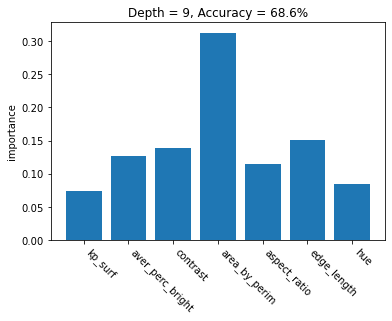

[0.12318834 0.1357171  0.12792512 0.2416857  0.11148919 0.10894026
 0.15105429]


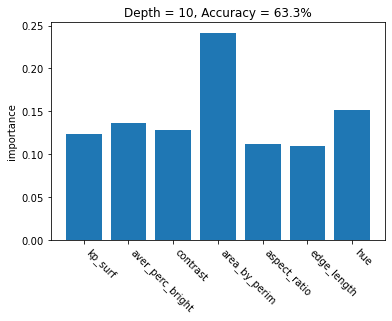

[0.1233333  0.12961483 0.14652829 0.24863787 0.11124519 0.13213815
 0.10850238]


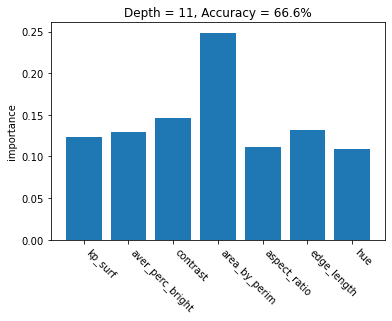

[0.16428714 0.15739575 0.11571748 0.20643491 0.15684113 0.09705473
 0.10226885]


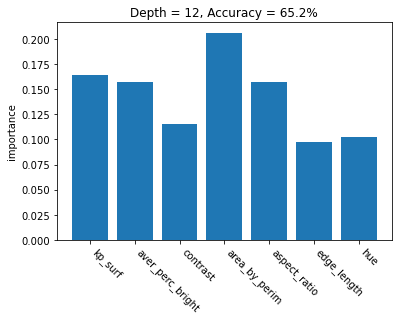

[0.159565   0.15028044 0.15707219 0.17408888 0.1146774  0.11725685
 0.12705924]


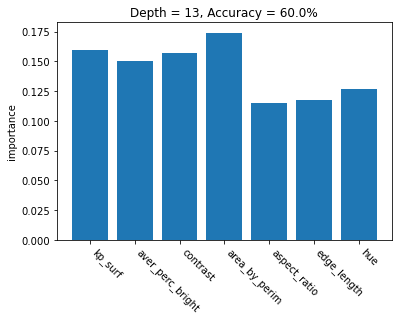

[0.12502514 0.13308759 0.14164235 0.20107053 0.16378346 0.11219659
 0.12319433]


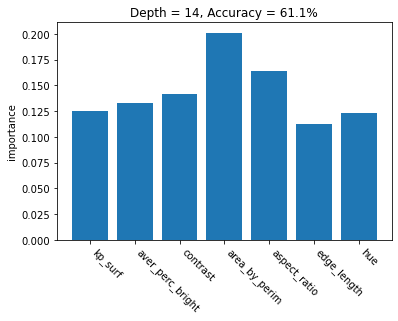

[0.12461119 0.14891245 0.13426261 0.19825908 0.15412945 0.1119423
 0.12788291]


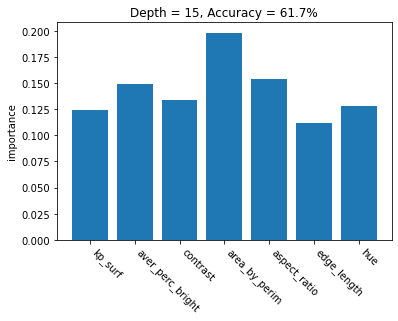

[0.1093753  0.15058834 0.13928464 0.19187534 0.14629185 0.1207131
 0.14187144]


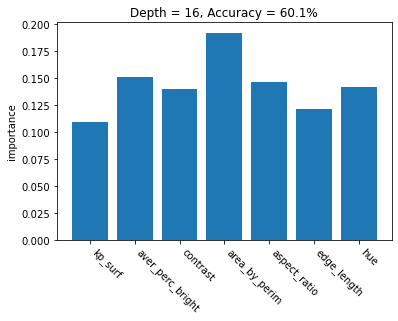

[0.11413987 0.16222125 0.1429091  0.18357542 0.14002781 0.11728307
 0.13984349]


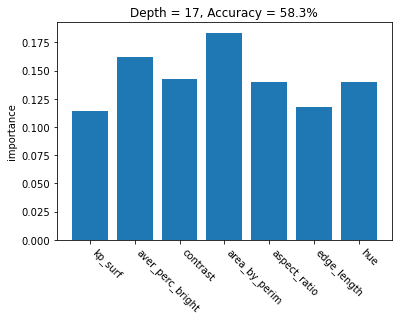

[0.13323834 0.14579935 0.15224219 0.18396773 0.13896083 0.11234345
 0.13344811]


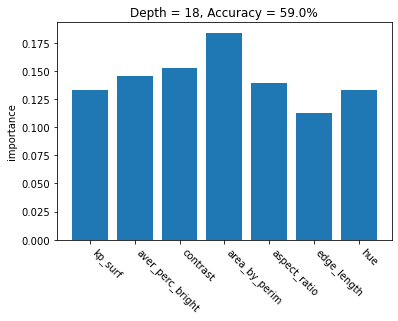

[0.11283976 0.14942946 0.15600816 0.1818386  0.13756839 0.11618199
 0.14613363]


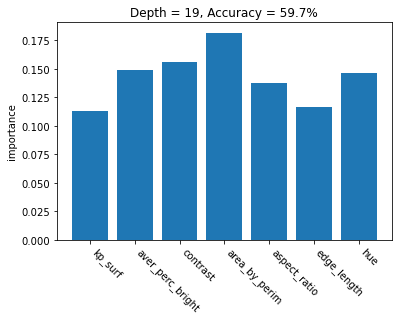

[0.14122656 0.14867168 0.13721044 0.16032324 0.16104522 0.12339626
 0.1281266 ]


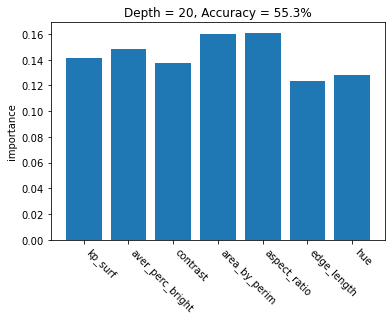

In [7]:
from matplotlib.pyplot import figure
%matplotlib inline
count = 1
for x in trees:
    ypos = np.arange(len(feature_names))
    score = x.score(x_test, y_test)
    plt.xticks(ypos, feature_names)
    plt.ylabel("importance")
    plt.title("Depth = {}, Accuracy = {}%".format(count, round(score*100, 2)))
    count += 1
    plt.bar(ypos, x.feature_importances_)
    plt.xticks(rotation=-45, ha='left')
    print(x.feature_importances_)
    plt.show()

In [8]:
count = 1
for tree in trees:
    prediction = tree.predict(x_test)
    results = [0, 0, 0, 0]
    for x in prediction:
        if x[0] == 1:
            results[0] += 1
        if x[1] == 1:
            results[1] += 1
        if x[2] == 1:
            results[2] += 1
        if x[0] == 0 and x[1] == 0 and x[2] == 0:
            results[3] += 1
    print('Maximum Depth: ', count)
    count += 1
    print('MobileNet: {}%\nInception: {}%\nResNet: {}%\nFailed: {}%\n'.format
          (
        round(results[0]/len(prediction)*100, 2), 
        round(results[1]/len(prediction)*100, 2), 
        round(results[2]/len(prediction)*100, 2), 
        round(results[3]/len(prediction)*100, 2)
    )
         )

Maximum Depth:  1
MobileNet: 100.0%
Inception: 0.0%
ResNet: 0.0%
Failed: 0.0%

Maximum Depth:  2
MobileNet: 100.0%
Inception: 0.0%
ResNet: 0.0%
Failed: 0.0%

Maximum Depth:  3
MobileNet: 99.6%
Inception: 0.0%
ResNet: 0.0%
Failed: 0.4%

Maximum Depth:  4
MobileNet: 99.6%
Inception: 0.4%
ResNet: 0.0%
Failed: 0.0%

Maximum Depth:  5
MobileNet: 96.6%
Inception: 0.0%
ResNet: 0.0%
Failed: 3.4%

Maximum Depth:  6
MobileNet: 95.8%
Inception: 0.1%
ResNet: 0.2%
Failed: 3.9%

Maximum Depth:  7
MobileNet: 90.5%
Inception: 0.7%
ResNet: 0.2%
Failed: 8.6%

Maximum Depth:  8
MobileNet: 92.8%
Inception: 1.0%
ResNet: 0.0%
Failed: 6.2%

Maximum Depth:  9
MobileNet: 94.2%
Inception: 0.9%
ResNet: 0.5%
Failed: 4.4%

Maximum Depth:  10
MobileNet: 84.2%
Inception: 3.6%
ResNet: 0.4%
Failed: 11.8%

Maximum Depth:  11
MobileNet: 89.1%
Inception: 2.4%
ResNet: 0.6%
Failed: 7.9%

Maximum Depth:  12
MobileNet: 86.7%
Inception: 2.5%
ResNet: 1.6%
Failed: 9.2%

Maximum Depth:  13
MobileNet: 74.8%
Inception: 7.9%
ResNet

In [9]:
prediction

array([[1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)

Binary Classification (MobileNet and Other)

In [10]:
Y = data[['Mobilenet_v1']]
X = data.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
X = np.array(X)
df = pd.DataFrame(data = X, columns = ['kp_surf', 'average_perceived_brightness', 'contrast', 'area_by_perim',
                                       'aspect_ratio', 'edge_length1', 'hue1'])

In [11]:
trees = []
for x in range(20):
    tree_model = DecisionTreeClassifier()
    parameters = {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': [x+1]}
    clf = GridSearchCV(tree_model, parameters)
    clf.fit(x_train, y_train)
    tree_model.set_params(**clf.best_params_)
    tree_model.fit(x_train, y_train)
    print("Depth: ", x+1)
    print("Training Accuracy: {}%".format(round(tree_model.score(x_train, y_train)*100, 3)))
    print("Testing Accuracy: {}%".format(round(tree_model.score(x_test, y_test)*100, 3)))
    print("\n")
    trees.append(tree_model)

Depth:  1
Training Accuracy: 71.375%
Testing Accuracy: 74.7%


Depth:  2
Training Accuracy: 71.375%
Testing Accuracy: 74.7%


Depth:  3
Training Accuracy: 71.4%
Testing Accuracy: 74.7%


Depth:  4
Training Accuracy: 71.75%
Testing Accuracy: 73.4%


Depth:  5
Training Accuracy: 71.85%
Testing Accuracy: 74.2%


Depth:  6
Training Accuracy: 72.65%
Testing Accuracy: 72.3%


Depth:  7
Training Accuracy: 72.4%
Testing Accuracy: 73.0%


Depth:  8
Training Accuracy: 73.35%
Testing Accuracy: 71.0%


Depth:  9
Training Accuracy: 76.0%
Testing Accuracy: 72.2%


Depth:  10
Training Accuracy: 75.65%
Testing Accuracy: 72.8%


Depth:  11
Training Accuracy: 74.95%
Testing Accuracy: 72.5%


Depth:  12
Training Accuracy: 79.375%
Testing Accuracy: 69.1%


Depth:  13
Training Accuracy: 82.4%
Testing Accuracy: 70.8%


Depth:  14
Training Accuracy: 83.025%
Testing Accuracy: 67.4%


Depth:  15
Training Accuracy: 85.05%
Testing Accuracy: 70.9%


Depth:  16
Training Accuracy: 86.225%
Testing Accuracy: 70.0%




[0. 0. 0. 1. 0. 0. 0.]


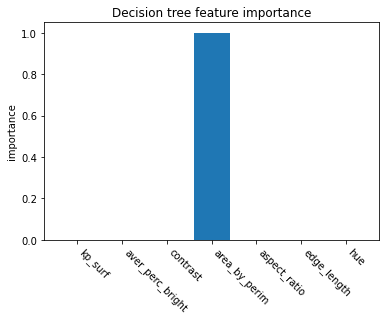

[0.         0.         0.         0.97677566 0.         0.
 0.02322434]


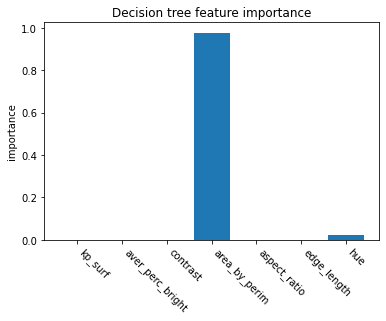

[0.36549504 0.02652887 0.26556175 0.10825491 0.09212102 0.
 0.1420384 ]


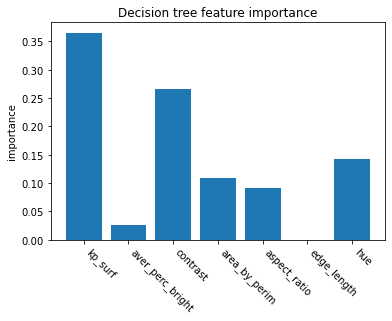

[0.12810439 0.09278417 0.02713512 0.69513364 0.01105163 0.04579105
 0.        ]


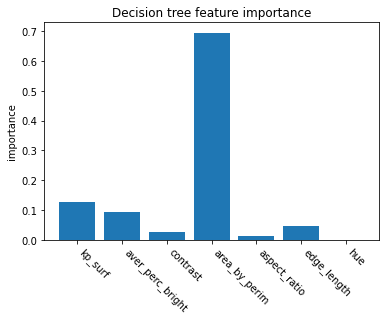

[0.03635317 0.12501619 0.09995685 0.65873656 0.02677812 0.02985913
 0.02329997]


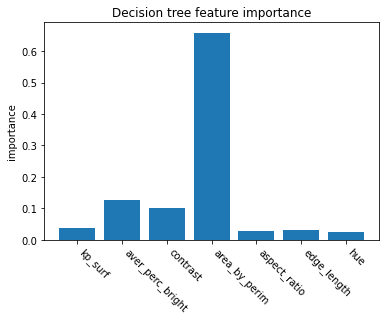

[0.07878617 0.07203019 0.07795933 0.59727856 0.03700173 0.02124862
 0.11569539]


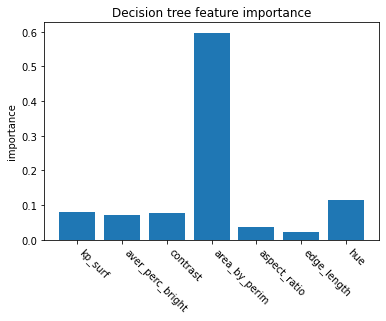

[0.03945522 0.06722604 0.08356818 0.59200332 0.12044658 0.06741193
 0.02988872]


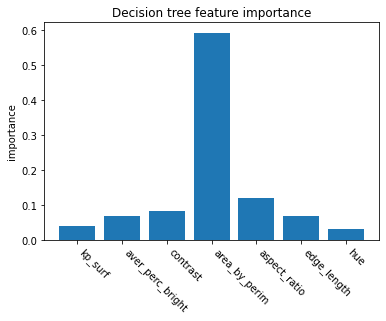

[0.11865255 0.08647377 0.09476912 0.29841814 0.14593652 0.1325436
 0.12320628]


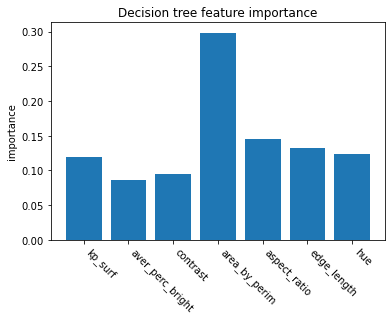

[0.10365977 0.18422978 0.10410741 0.24754048 0.11563477 0.10532327
 0.13950451]


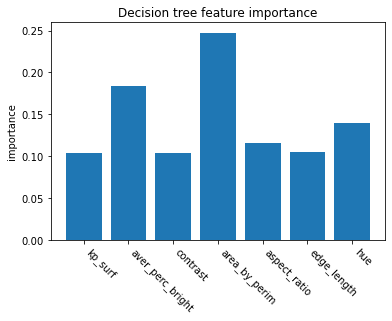

[0.07414814 0.14841297 0.11507751 0.27523404 0.12548057 0.1355951
 0.12605167]


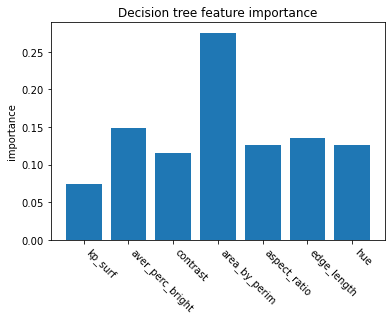

[0.09138224 0.12323727 0.15893512 0.28738084 0.11172133 0.08011393
 0.14722926]


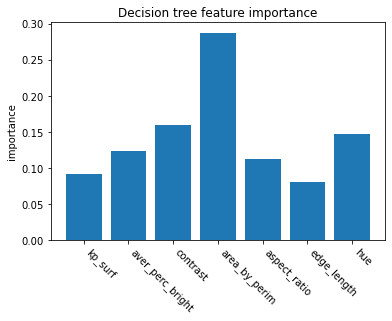

[0.11678037 0.10831152 0.12931431 0.23456673 0.13460906 0.15926678
 0.11715124]


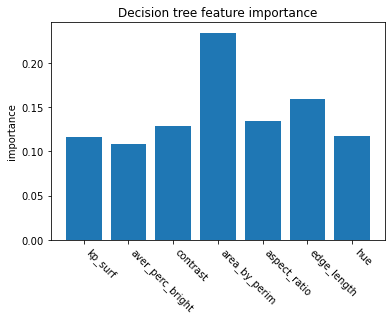

[0.13690536 0.1464564  0.10932642 0.21236057 0.16680661 0.11059863
 0.11754602]


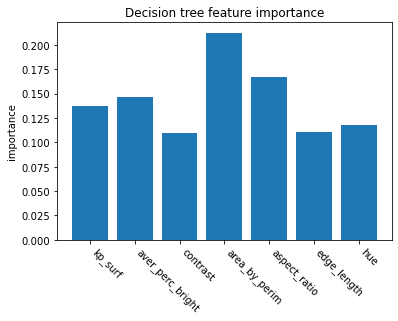

[0.11278748 0.13273429 0.12877685 0.1850414  0.15713247 0.14446548
 0.13906203]


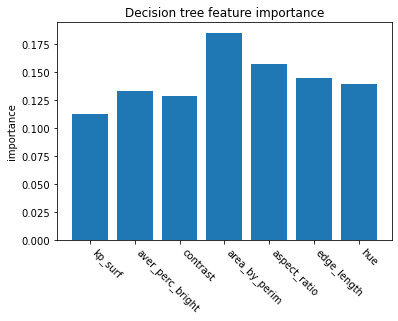

[0.13516047 0.14131613 0.10806794 0.2093562  0.17038027 0.10887123
 0.12684774]


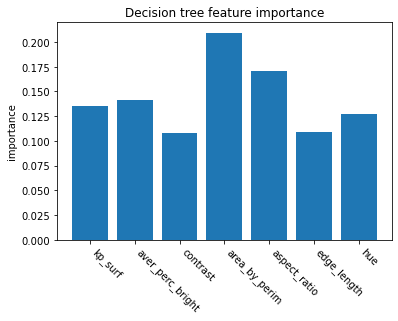

[0.14132005 0.13728085 0.11657193 0.20546945 0.16038405 0.10902698
 0.12994668]


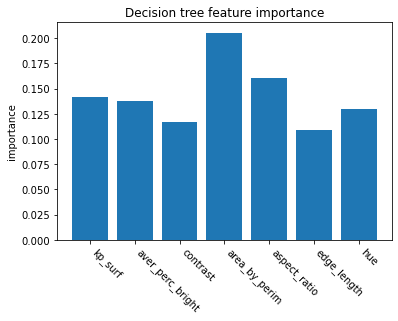

[0.13097515 0.15129581 0.13516131 0.19043574 0.15401686 0.10697979
 0.13113533]


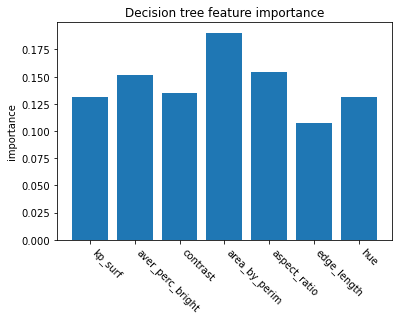

[0.13797254 0.15200731 0.13424893 0.14801778 0.14249891 0.14558903
 0.13966551]


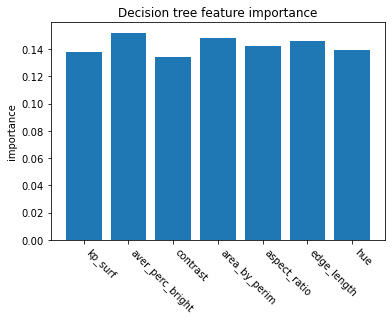

[0.12950391 0.1535877  0.11206026 0.17790889 0.15658209 0.12637813
 0.14397901]


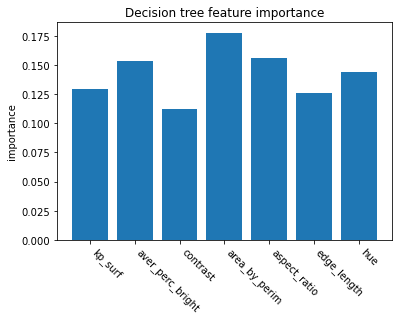

[0.15018749 0.15153669 0.11083665 0.17163788 0.15490077 0.13580779
 0.12509274]


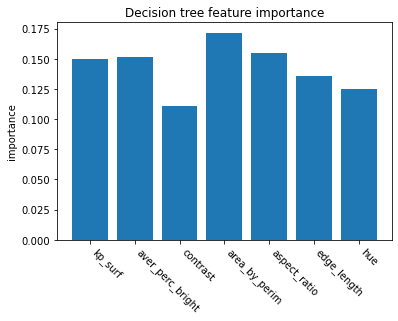

In [12]:
for x in trees:
    ypos = np.arange(len(feature_names))

    plt.xticks(ypos, feature_names)
    plt.ylabel("importance")
    plt.title("Decision tree feature importance")
    plt.bar(ypos, x.feature_importances_)
    plt.xticks(rotation=-45, ha='left')
    print(x.feature_importances_)
    plt.show()

In [13]:
count = 1
for tree in trees:
    prediction = tree.predict(x_test)
    print('Maximum Depth: ', count)
    count += 1
    print('MobileNet: {}%\nOther: {}%\n'.format
    (
    round(np.count_nonzero(prediction == 1)/len(prediction)*100, 2), 
    round(np.count_nonzero(prediction == 0)/len(prediction)*100, 2)
    )
         )

Maximum Depth:  1
MobileNet: 100.0%
Other: 0.0%

Maximum Depth:  2
MobileNet: 100.0%
Other: 0.0%

Maximum Depth:  3
MobileNet: 100.0%
Other: 0.0%

Maximum Depth:  4
MobileNet: 97.9%
Other: 2.1%

Maximum Depth:  5
MobileNet: 98.7%
Other: 1.3%

Maximum Depth:  6
MobileNet: 91.6%
Other: 8.4%

Maximum Depth:  7
MobileNet: 94.7%
Other: 5.3%

Maximum Depth:  8
MobileNet: 92.3%
Other: 7.7%

Maximum Depth:  9
MobileNet: 91.1%
Other: 8.9%

Maximum Depth:  10
MobileNet: 87.5%
Other: 12.5%

Maximum Depth:  11
MobileNet: 90.0%
Other: 10.0%

Maximum Depth:  12
MobileNet: 85.4%
Other: 14.6%

Maximum Depth:  13
MobileNet: 85.3%
Other: 14.7%

Maximum Depth:  14
MobileNet: 82.3%
Other: 17.7%

Maximum Depth:  15
MobileNet: 85.2%
Other: 14.8%

Maximum Depth:  16
MobileNet: 83.5%
Other: 16.5%

Maximum Depth:  17
MobileNet: 82.9%
Other: 17.1%

Maximum Depth:  18
MobileNet: 70.2%
Other: 29.8%

Maximum Depth:  19
MobileNet: 80.8%
Other: 19.2%

Maximum Depth:  20
MobileNet: 79.4%
Other: 20.6%

